# BasicTauHybridSolver

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import numpy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.basic_tau_hybrid_solver import BasicTauHybridSolver

### Model Instantiation

Model must include rates, species, and reactions

In [3]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='Substrate', initial_value=301)
            B = gillespy2.Species(name='Enzyme', initial_value=120)
            C = gillespy2.Species(name='Enzyme_Substrate_Complex', initial_value=0)
            D = gillespy2.Species(name='Product', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [4]:
model = MichaelisMenten()


### Run Model and plot

In [5]:
%time results = model.run(solver=BasicTauHybridSolver())

CPU times: user 467 ms, sys: 8.46 ms, total: 476 ms
Wall time: 568 ms


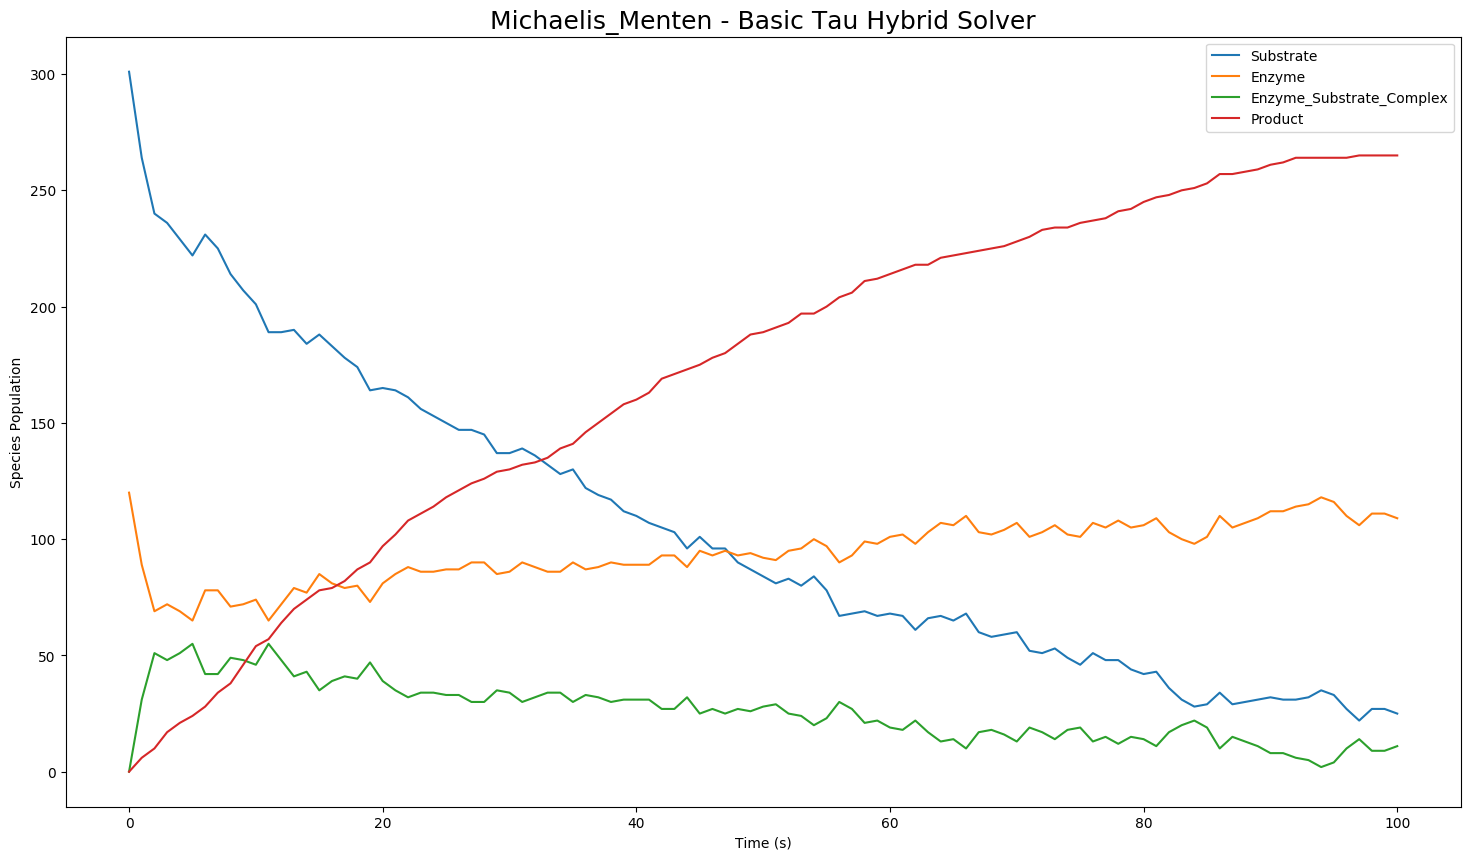

In [6]:
results.plot()

The number_of_trajectories specifies how many times you would like to run the solver.

In [7]:
%time results_many_trajectories = model.run(solver=BasicTauHybridSolver(),number_of_trajectories=5)

CPU times: user 2.27 s, sys: 34.1 ms, total: 2.3 s
Wall time: 2.35 s


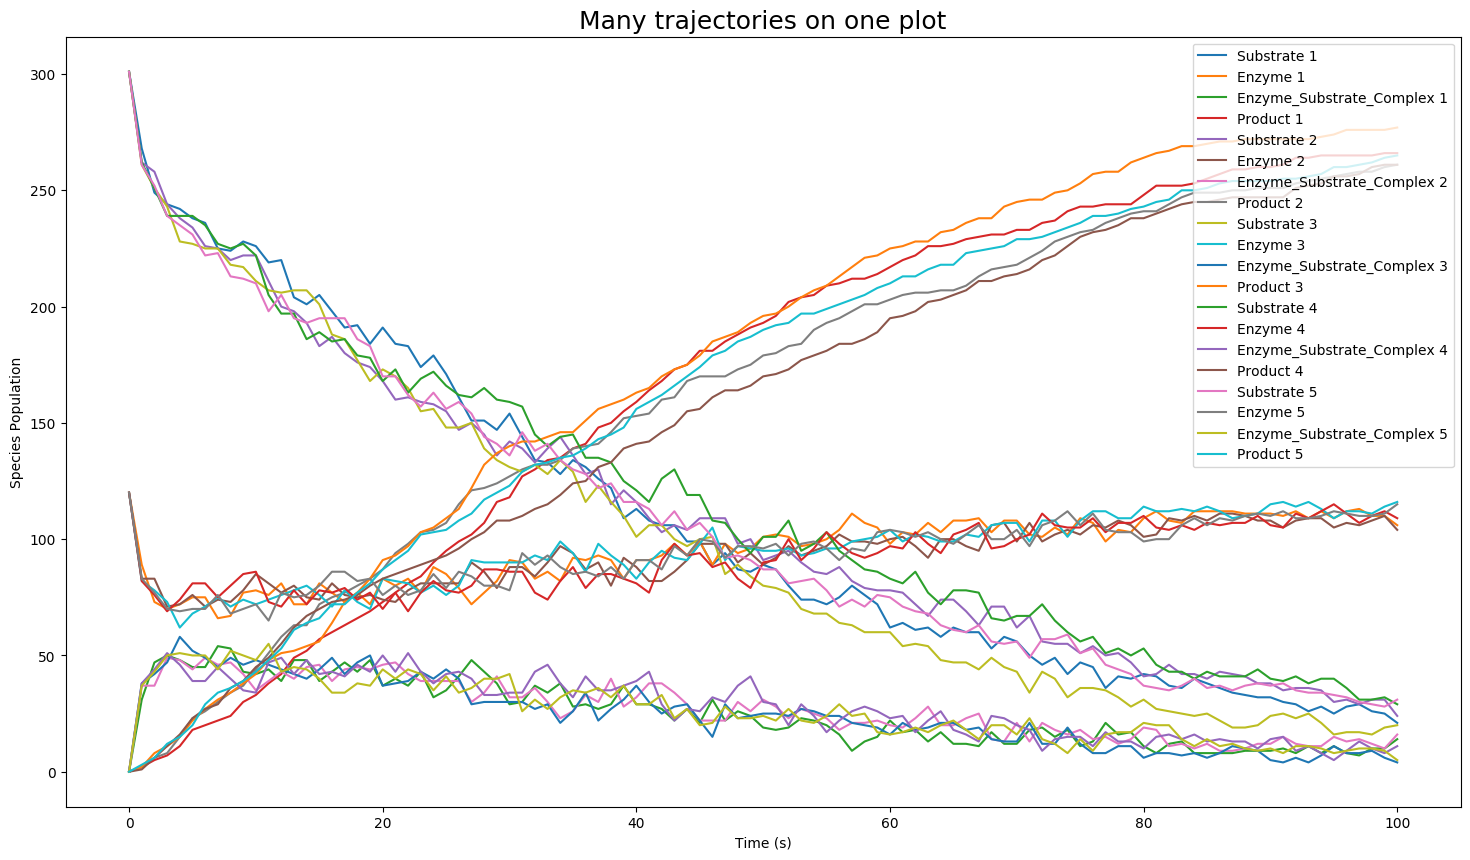

In [8]:
results_many_trajectories.plot(title="Many trajectories on one plot")

The EnsembleResults List created by multiple trajectories can use the average_ensemble function to create a single average of all the trajectories.

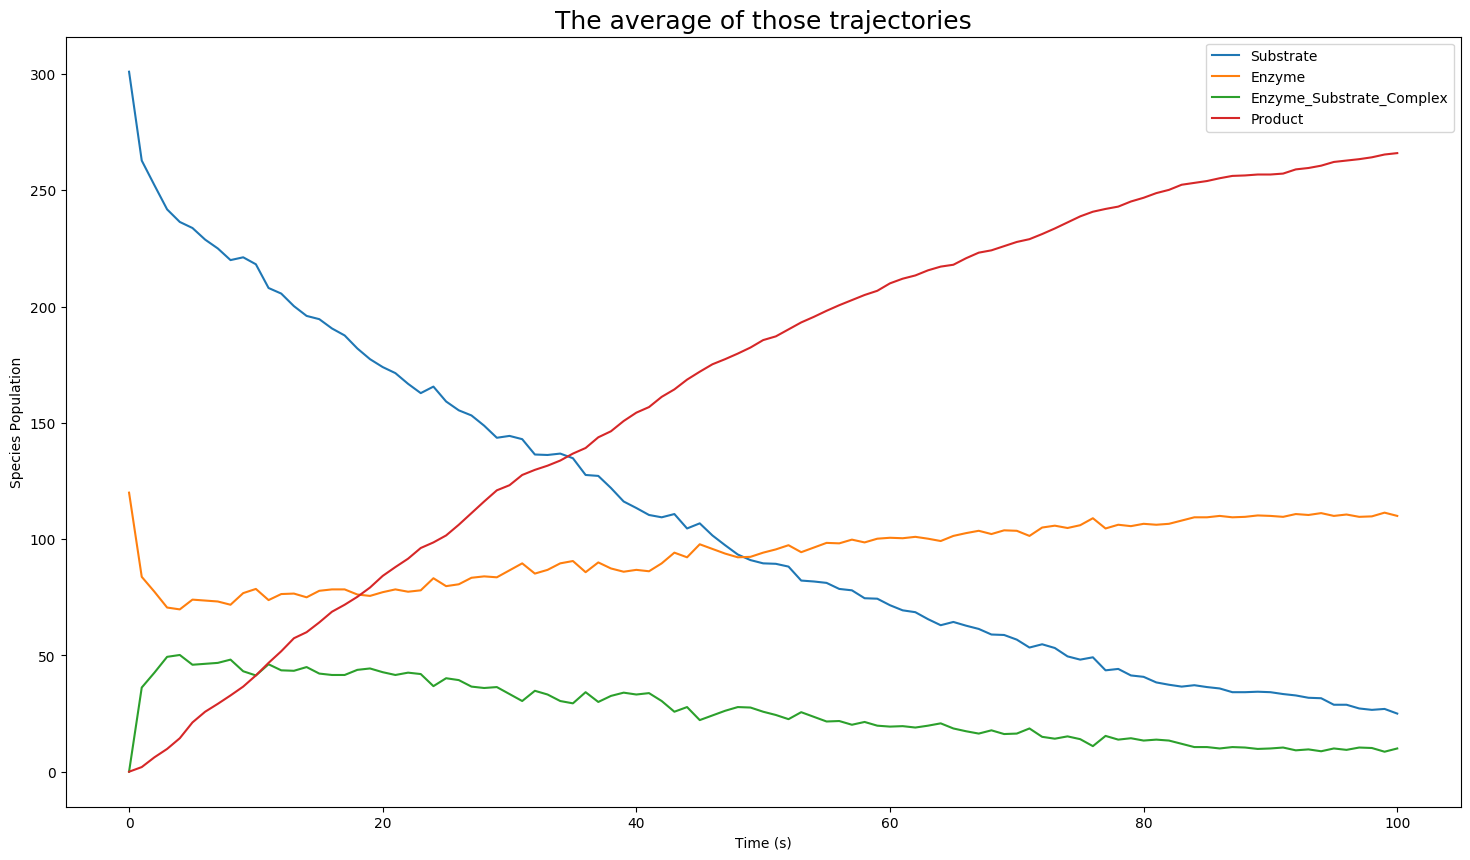

In [9]:
average_results = results_many_trajectories.average_ensemble()
average_results.plot(title="The average of those trajectories")

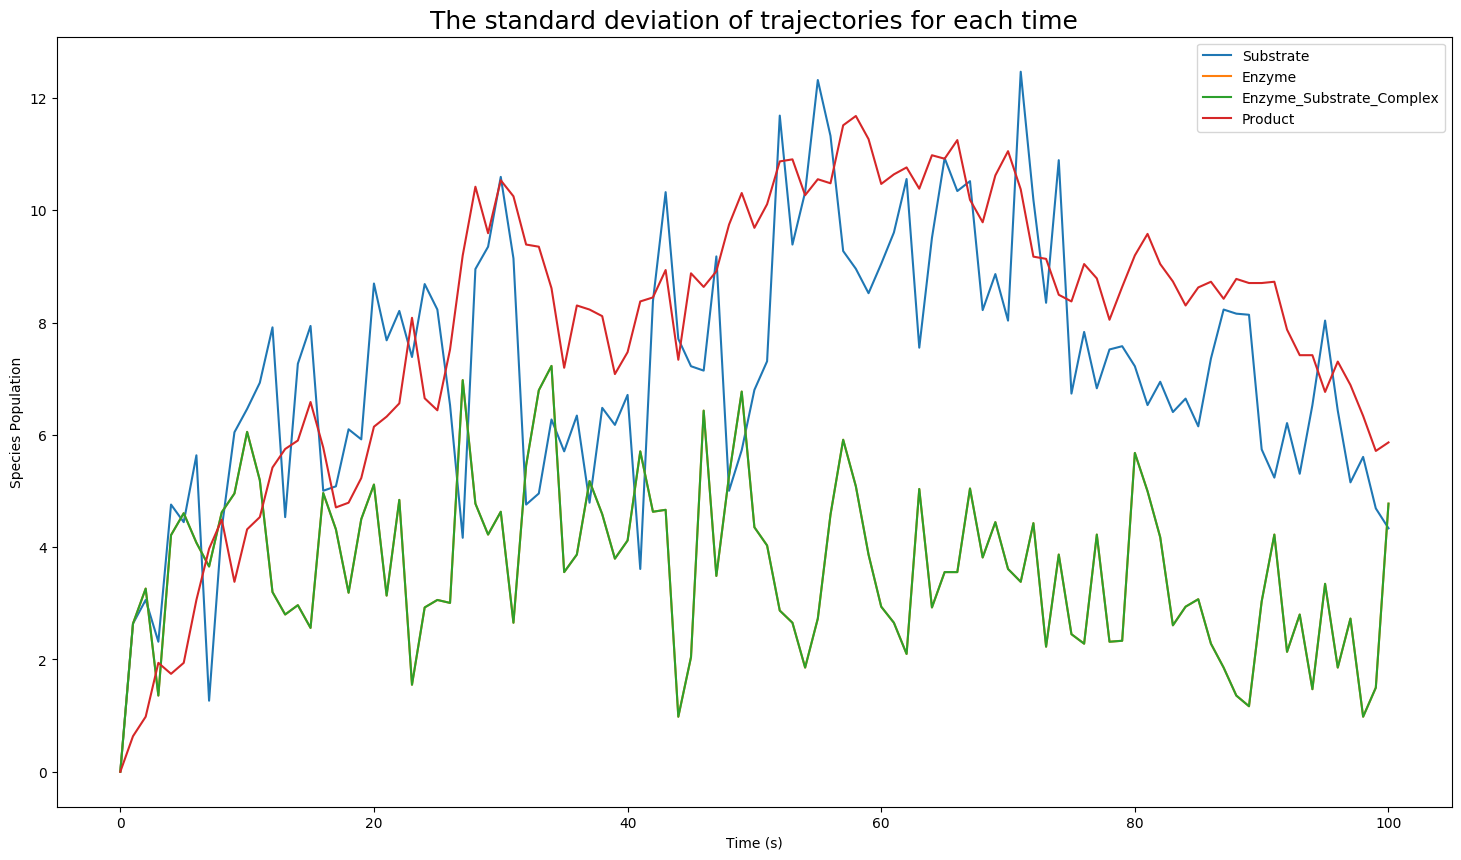

In [10]:
stddev_results = results_many_trajectories.stddev_ensemble()
stddev_results.plot(title="The standard deviation of trajectories for each time")

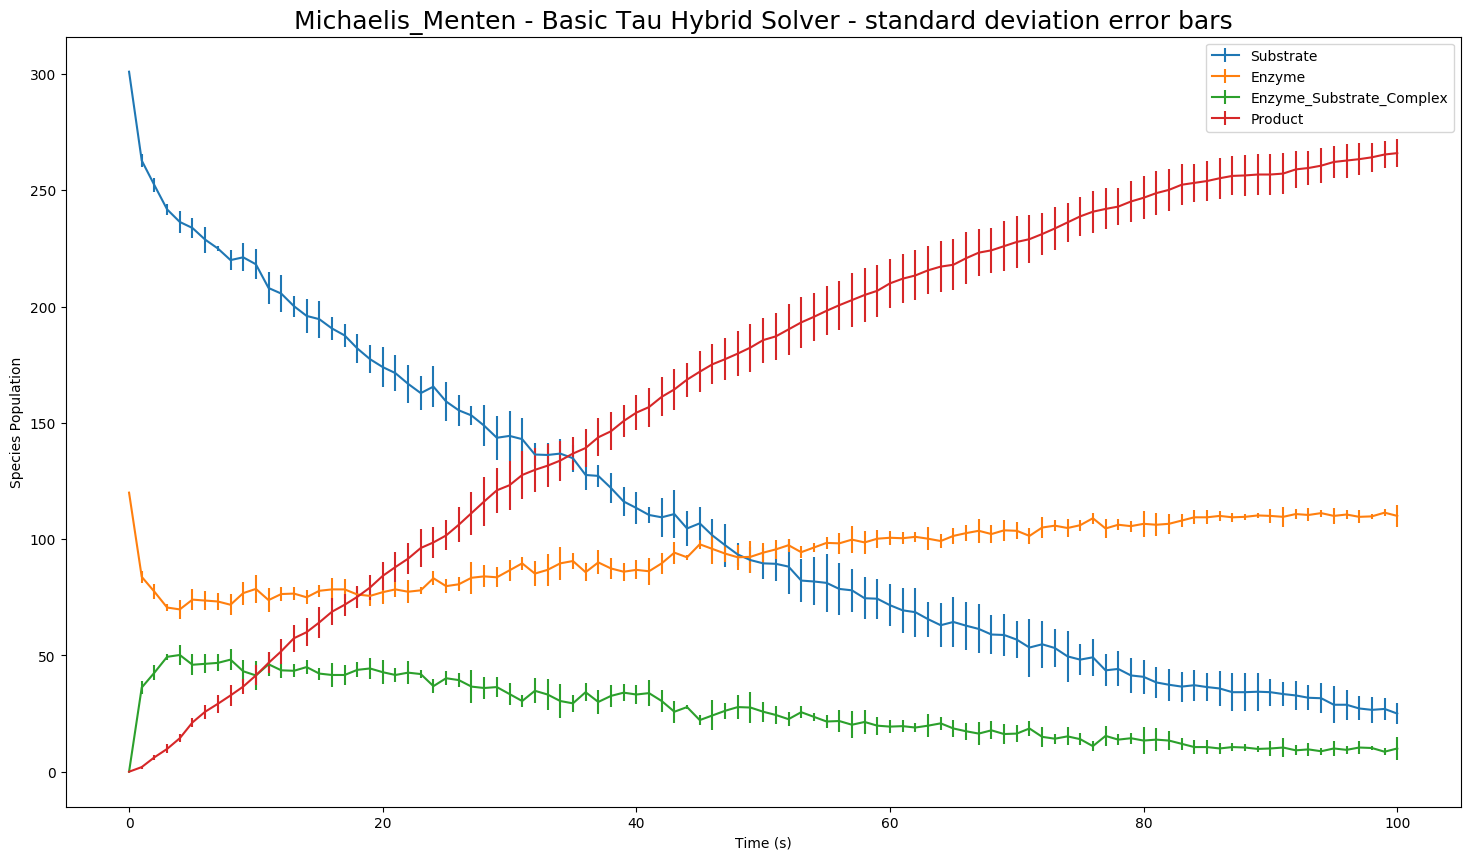

In [11]:
results_many_trajectories.plot_std_dev_error_bars()

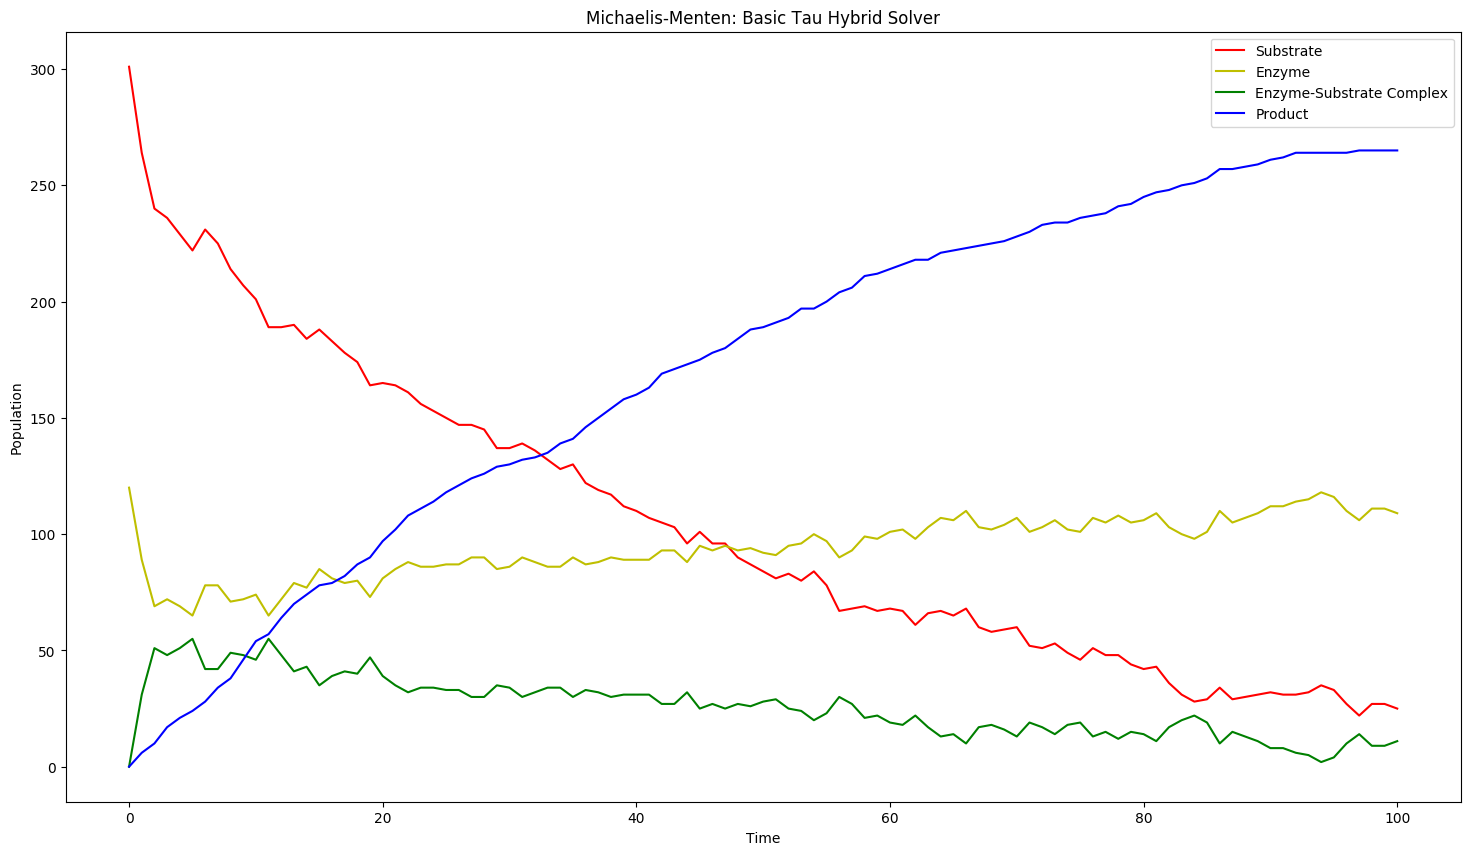

In [12]:
plt.figure(figsize=(18,10))
plt.title("Michaelis-Menten: Basic Tau Hybrid Solver")
plt.xlabel("Time")
plt.ylabel("Population")
plt.plot(results['time'],results['Substrate'],'r', label='Substrate')
plt.plot(results['time'],results['Enzyme'],'y', label='Enzyme')
plt.plot(results['time'],results['Enzyme_Substrate_Complex'],'g', label='Enzyme-Substrate Complex')
plt.plot(results['time'],results['Product'],'b', label='Product')

plt.plot([0],[11])
plt.legend(loc='best')

The Hybrid solver uses Tau-Leaping which utilizes the concept that the relative change in propensities is bounded by the relative change in species populations.  This calculation allows for a user-defined margin of error (tau_tol) which can be changed by instantiating the solver and calling the run function from the solver, rather than the model.  
  
The default tolerance is set to .03, which should be a good tolerance for most models.  Increasing (0.0-1.0) will allow for larger tau steps (faster run times) at lower stochastic accuracy, while decreasing the tolerance will allow for greater accuracy with smaller steps and slower run times.

In [13]:
modified_solver = BasicTauHybridSolver()

In [14]:
%time results2 = modified_solver.run(model, tau_tol=0.5, t=100, increment=1)

# Notice the difference in run-time

CPU times: user 114 ms, sys: 5.21 ms, total: 119 ms
Wall time: 125 ms


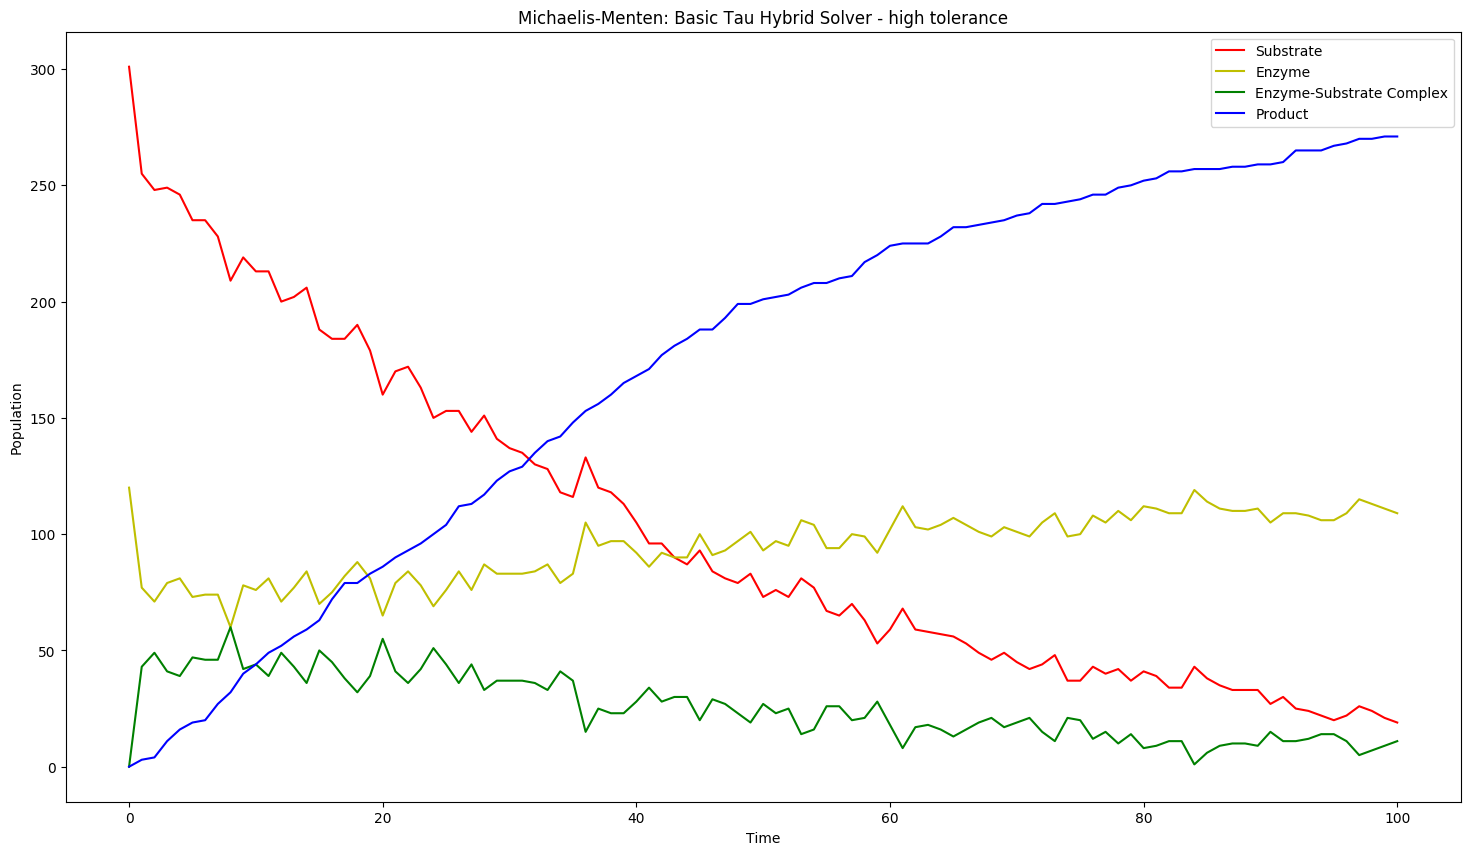

In [17]:
plt.figure(figsize=(18,10))
plt.title("Michaelis-Menten: Basic Tau Hybrid Solver - high tolerance")
plt.xlabel("Time")
plt.ylabel("Population")
plt.plot(results2[0]['time'],results2[0]['Substrate'],'r', label='Substrate')
plt.plot(results2[0]['time'],results2[0]['Enzyme'],'y', label='Enzyme')
plt.plot(results2[0]['time'],results2[0]['Enzyme_Substrate_Complex'],'g', label='Enzyme-Substrate Complex')
plt.plot(results2[0]['time'],results2[0]['Product'],'b', label='Product')

plt.plot([0],[11])
plt.legend(loc='best')